In [1]:
import numpy as np
import os
import pandas as pd # lo agregué para leer los datos y filtrarlos más fácilmente
import matplotlib.pyplot as plt

np.random.seed(20638752) # Pon tu número de alumno como seed (J = 0)

Recuerda usar variables descriptivas durante toda la tarea

# Actividad 1: Limpiando los datos

In [2]:
df = pd.read_csv('../db_diabetes.csv', sep=',')

Vamos a ver la cantidad de valores nulos (``null``) hay en el dataset, separandolo por atributo.

In [3]:
nulos = df.isna().sum()
print(nulos)
print('mínima cant de nulos (en un atributo):', min(nulos))
print('máxima cantidad de nulos (en un atributo):', max(nulos))

Diabetes_binary         215
HighBP                  189
HighChol                174
CholCheck               189
BMI                     197
Smoker                  216
Stroke                  219
HeartDiseaseorAttack    213
PhysActivity            188
Fruits                  244
Veggies                 186
HvyAlcoholConsump       203
AnyHealthcare           190
NoDocbcCost             191
GenHlth                 171
MentHlth                212
PhysHlth                193
DiffWalk                182
Sex                     190
Age                     212
Education               212
Income                  197
HairColor               205
Height                  206
Weight                  202
dtype: int64
mínima cant de nulos (en un atributo): 171
máxima cantidad de nulos (en un atributo): 244


In [4]:
print("La cantidad de filas en el dataset es",len(df))
print(f"[ {(171/70692)*100}% - {(244/70692)*100}% ]")

La cantidad de filas en el dataset es 70692
[ 0.2418944152096418% - 0.34515928252136024% ]


Entonces como podemos ver, la cantidad de nulos va entre 171 y 244 para cada atributo. El dataset tiene 70692 filas, por lo que la cantidad de nulos representa entre un 0.24% y un 0.35% de los datos. Esta es una fracción muy pequeña, por lo que eliminaremos los datos que contengan un valor nulo **en algún atributo relevante** (No consideramos todas las columnas al eliminar nulos ya que se perderían muchos datos, y por ejemplo, si hubiera un dato con ``HairColor = null`` se estaría eliminando un dato que sigue siendo útil).

No tomaremos en cuenta los nulos de las columnas ``HairColor``, ``Income``, ``Education``, ``AnyHealthcare``, ``CholCheck`` y ``NoDocbcCost`` porque son cosas que no indican nada acerca de la salud de las personas (o su tendencia a tener diabetes)

Tampoco se tendrá en cuenta la columna ``MentHlth`` ya que la salud mental no afecta (tan directamente) en la salud física.

Tampoco se eliminarán los nulos de las columnas ``Height`` y ``Weight`` ya que estas componen al índice de masa corporal (``BMI``), y si se tiene éste último no es necesario tener la altura ni el peso, ya que es el BMI el que describe de mejor manera la salud de las personas.

Tampoco se eliminarán los nulos de las columnas ``PhysActivity``, ``Age`` y ``Sex`` ya que, si bien estas pueden ser útiles en notar tendencias, no son indicadores fuertes de la diabetes (por ejemplo, las personas que hacen actividad física mostrarán un mayor nivel de salud general, y éste último será un valor que sí tendremos disponible para hacer predicciones).

Finalmente tampoco se eliminarán los nulos de las columnas ``Fruits`` y ``Veggies`` ya que estos indican la alimentación de las personas, pero influyen directamente sobre la salud física, atributo que sí estamos tomando en cuenta. No son indispensables para la predicción de diabetes.

In [5]:
innecesarias = ["HairColor", "Income", "Education", "AnyHealthcare", "CholCheck", "NoDocbcCost", "MentHlth", "Height", 
"Weight", "PhysActivity", "Age", "Sex", "Fruits", "Veggies"]

#  buscamos las columnas que sí tendremos en cuenta para eliminar nulos
cols = [item for item in df.columns if item not in innecesarias]
print('Se eliminan los datos que contengan nulos en las columnas:\n',cols)

# borramos los datos nulos
df.dropna(subset=cols, inplace=True)
df


Se eliminan los datos que contengan nulos en las columnas:
 ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'PhysHlth', 'DiffWalk']


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HairColor,Height,Weight
0,no_diabetes,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,5.0,30.0,0.0,male,4.0,6.0,8.0,grey,1.70,75.0
1,no_diabetes,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,male,12.0,6.0,8.0,blonde,1.66,72.0
2,no_diabetes,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,10.0,0.0,male,13.0,6.0,8.0,black,1.74,79.0
3,no_diabetes,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,male,11.0,6.0,8.0,red,1.69,80.0
4,no_diabetes,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,female,8.0,5.0,8.0,black,1.72,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,diabetes,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,female,6.0,4.0,1.0,black,1.72,109.0
70688,diabetes,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,male,10.0,3.0,6.0,black,1.74,88.0
70689,diabetes,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,15.0,0.0,1.0,female,13.0,6.0,4.0,brown,1.71,73.0
70690,diabetes,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,female,11.0,2.0,4.0,blonde,1.71,53.0


# Actividad 2: Visualizando y comprendiendo

Eliminaré las columnas de ``HairColor``, ``Income``, ``Education``, ``AnyHealthcare`` y ``NoDocbcCost`` porque son cosas que no indican nada acerca de la salud de las personas (o su tendencia a tener diabetes)

También se eliminan las columnas ``Height`` y ``Weight`` ya que estas componen al índice de masa corporal (``BMI``) y los atributos no debieran ser dependientes entre sí (además que el BMI es el atributo que nos entrega la información reelevante acerca de la salud de las personas).

In [6]:
df.drop(["HairColor", "Income", "Education", "AnyHealthcare", "NoDocbcCost", "Height", "Weight"], axis = 1, inplace=True)
print(", ".join(df.columns))

Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age


Cambiamos los valores de la columna ``Diabetes_binary`` tal que ``no_diabetes = 0`` y ``diabetes = 1`` para poder hacer cálculos con respecto a las personas con diabetes

In [7]:
df['Diabetes_binary'].replace(['diabetes', 'no_diabetes'], [1, 0], inplace=True)

Buscaremos la relación entre algunos atributos pertinentes a la salud de las personas y la tendencia a tener diabetes:

In [8]:
# print(df.groupby("HighBP").mean(numeric_only=True)['Diabetes_binary'])
# HighBP
print(df.groupby("HighBP")['Diabetes_binary'].mean())
# HighChol
print(df.groupby("HighChol")['Diabetes_binary'].mean())
# BMI promedio (separado según diabetes)
print(df.groupby("Diabetes_binary")['BMI'].mean())


HighBP
0.0    0.283542
1.0    0.667538
Name: Diabetes_binary, dtype: float64
HighChol
0.0    0.347857
1.0    0.637419
Name: Diabetes_binary, dtype: float64
Diabetes_binary
0    27.771019
1    31.952845
Name: BMI, dtype: float64


Podemos ver que hay una tendencia marcada que indica que las personas con diabetes tienden a tener la presión alta (``HighBP``) y el colesterol alto (``HighChol``). El índice de masa corporal (``BMI``) promedio de las personas con diabetes es levemente mayor que el de las personas sanas, pero no es tan notoria. La ilustraremos con un gráfico para entenderla mejor:

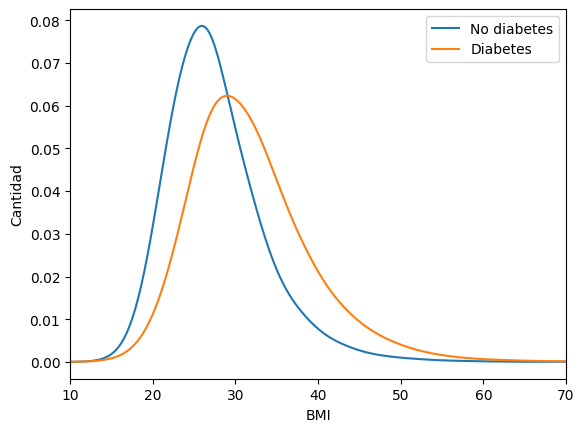

In [9]:
# se debe instalar scipy con 'pip install scipy' antes de correr esto
df.groupby('Diabetes_binary')['BMI'].plot.density(bw_method=0.3, legend=True)
plt.xlim([10, 70])
plt.xlabel('BMI')
plt.ylabel('Cantidad')
plt.legend(['No diabetes','Diabetes'])
plt.show()

Podemos notar que entre las personas con un mayor BMI hay una mayor cantidad de personas con diabetes, pero la tendencia está solo levemente marcada.

Ya que las columnas ``Fruits`` y ``Veggies`` ambas nos indican los hábitos alimenticios de las personas, buscamos la relación entre ellas:

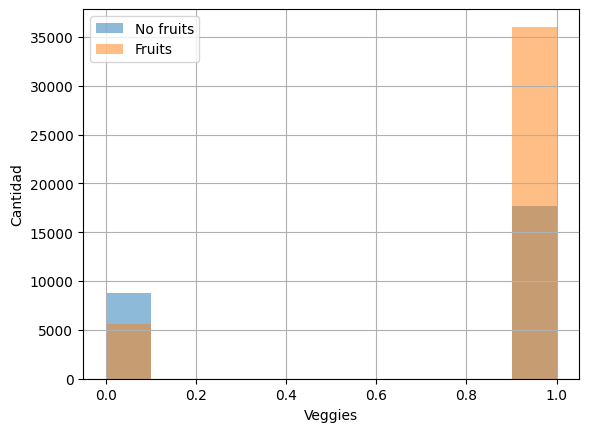

In [10]:
df.groupby('Fruits')['Veggies'].hist(alpha=0.5, legend=True)
plt.xlabel('Veggies')
plt.ylabel('Cantidad')
plt.legend(['No fruits','Fruits'])
plt.show()

Se puede notar que las personas que comen veggies (barra derecha) en general también consumen fruta (barra naranja). De la misma forma se puede notar que las personas que **no** comen veggies (barra izquierda), en general tampoco comen frutas (barra azul). Pero también se puede notar que, dentro de las personas que **no comen frutas**, hay una mayor cantidad que sí come verduras. Calculemos la relación en ambas direcciones:

In [11]:
print(df.groupby("Veggies")['Fruits'].mean())
print(df.groupby("Fruits")['Veggies'].mean())

Veggies
0.0    0.387086
1.0    0.670990
Name: Fruits, dtype: float64
Fruits
0.0    0.667245
1.0    0.866226
Name: Veggies, dtype: float64


A través de esto podemos concluir que el consumo de verduras (``Veggies``) es el atributo que mejor representa la alimentación de las personas (el consumo de verduras es mejor para predecir el consumo de frutas que vice versa). Entonces el consumo de verduras nos indica de mejor manera los hábitos alimenticios de las personas (Las personas que no comen verduras tienden a tampoco comer frutas, mientras las personas que no comen frutas no muestran una tendencia a comer menos verduras). Además podemos notar que es mucho más común comer verduras que comer frutas.

Ahora buscaremos la relación entre la alimentación de las personas y la tendencia a la diabetes:

In [12]:
df.groupby('Diabetes_binary')[['Veggies','Fruits']].describe()

Veggies                                               \
                   count      mean       std  min  25%  50%  75%  max   
Diabetes_binary                                                         
0                34185.0  0.821033  0.383331  0.0  1.0  1.0  1.0  1.0   
1                34180.0  0.756378  0.429273  0.0  1.0  1.0  1.0  1.0   

                  Fruits                                               
                   count      mean       std  min  25%  50%  75%  max  
Diabetes_binary                                                        
0                34158.0  0.637420  0.480752  0.0  0.0  1.0  1.0  1.0  
1                34154.0  0.584646  0.492790  0.0  0.0  1.0  1.0  1.0

Luego con esto podemos concluir que no hay una relación clara entre el consumo de frutas y verduras y la tendencia a la diabetes, por lo que eliminaremos dichas columnas del dataset. (y lloramos porque todo el análisis anterior no sirvió de nada)

In [13]:
# Eliminamos Fruits y Veggies
df.drop(["Veggies", "Fruits"], axis = 1, inplace=True)
print(", ".join(df.columns))

Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age


Buscaremos la relación entre los atributos de salud física y mental de las personas, y luego las compararemos con la salud general.

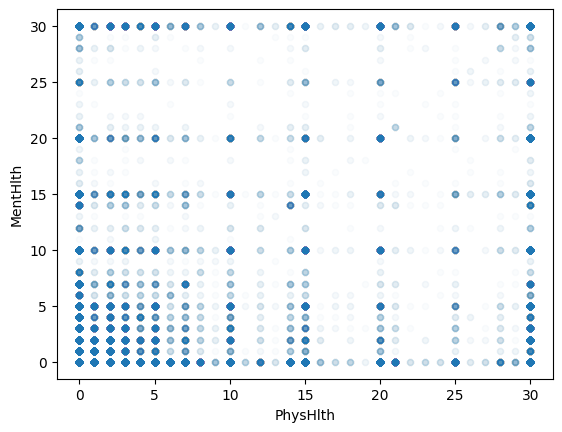

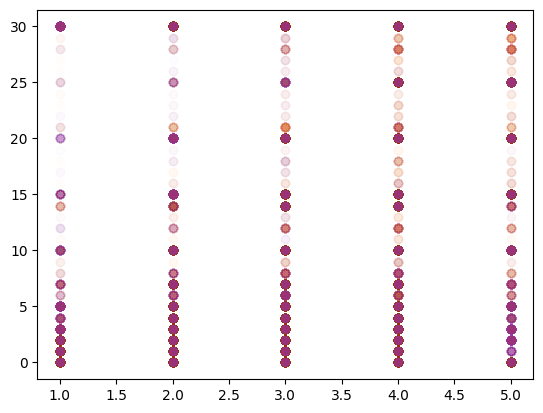

In [14]:
df.plot.scatter(x="PhysHlth", y="MentHlth", alpha=0.02, legend=True)
plt.show()

plt.scatter(x=df["GenHlth"], y=df["PhysHlth"], alpha=0.01, c="orange")
plt.scatter(x=df["GenHlth"], y=df["MentHlth"], alpha=0.01, c="darkorchid")
plt.show()



En general se puede notar que los malestares físicos y mentales durante los últimos 30 días (``MentHlth`` y ``PhysHlth``) son muy similares en todos los niveles de salud general (``GenHlth``), y en el primer gráfico se puede ver que no hay una relación directa entre la salud mental y física durante el último mes. De esta forma podemos ver que son atributos independientes. Ahora veamos cómo influyen en la tendencia a la diabetes:

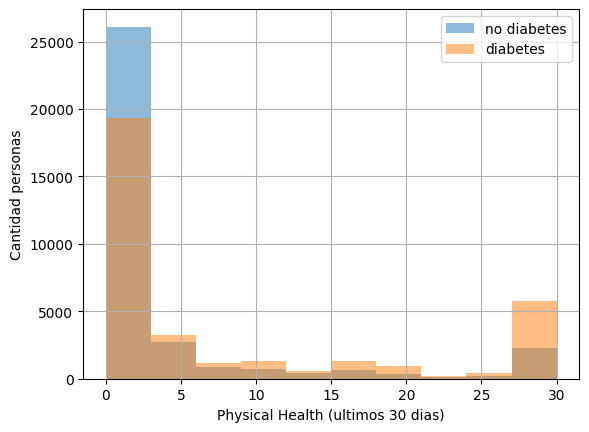

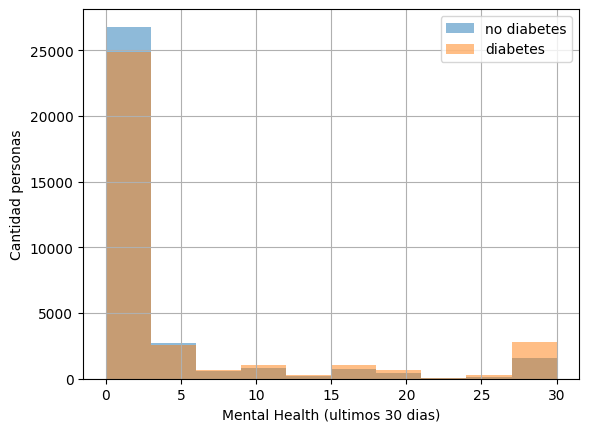

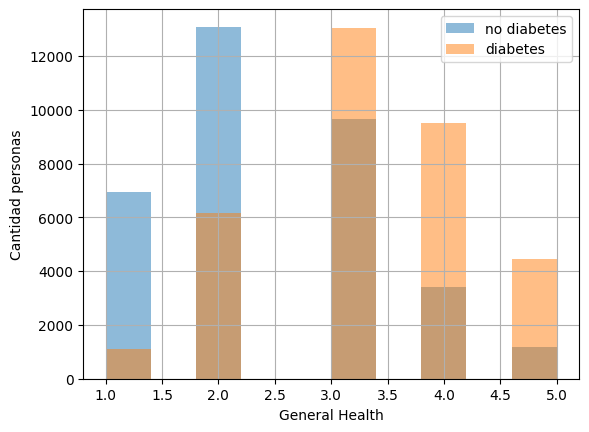

In [15]:
df.groupby('Diabetes_binary')['PhysHlth'].hist(alpha=0.5, legend=True)
plt.xlabel('Physical Health (ultimos 30 dias)')
plt.ylabel('Cantidad personas')
plt.legend(['no diabetes','diabetes'])
plt.show()

df.groupby('Diabetes_binary')['MentHlth'].hist(alpha=0.5, legend=True)
plt.xlabel('Mental Health (ultimos 30 dias)')
plt.ylabel('Cantidad personas')
plt.legend(['no diabetes','diabetes'])
plt.show()

df.groupby('Diabetes_binary')['GenHlth'].hist(alpha=0.5, legend=True)
plt.xlabel('General Health')
plt.ylabel('Cantidad personas')
plt.legend(['no diabetes','diabetes'])
plt.show()

Se puede deducir de los primeros dos histogramas que la salud mental reciente tiene menos relación con la diabetes que la salud física reciente. De todas maneras la salud física reciente muestra una leve tendencia con respecto a la diabetes, por lo que es un indicador (aunque no muy decisivo) que nos servirá para predecir la diabetes. A partir del primer gráfico se decide **eliminar la columna de ``MentHlth``** ya que no tiene alguna tendencia notoria que indique diabetes.

Finalmente, del tercer gráfico se puede notar claramente la diferencia entre el histograma azul y el naranjo. Esto demuestra que las personas con diabetes tienden a tener un peor nivel de salud general, mientras las personas sin diabetes generalmente tienen un mejor estado de salud general. Infiriendo de aquí que ``GenHlth`` es un buen predictor de diabetes.

In [16]:
# Eliminamos MentHlth
df.drop(["MentHlth"], axis = 1, inplace=True)
print(", ".join(df.columns))

Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump, GenHlth, PhysHlth, DiffWalk, Sex, Age


In [ ]:
a = df['CholCheck'].sum()
b = df['CholCheck'].count()
print('Personas totales:',b)
print('Personas checkeadas:',a)
print(f'El { (a/b)*100 }% de las personas se ha checkeado')

Acá podemos ver que sobre el 97% de las personas se checkeó el colesterol. Los datos así de heterogéneos no son muy útiles para predecir valores ya que al entrenar el atributo casi siempre toma el mismo valor.

In [ ]:
df.groupby("DiffWalk")["Diabetes_binary"].describe()

Acá podemos ver que en promedio, una mayor razón de personas con dificultad para caminar padecen de diabetes.

In [ ]:
#['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'PhysHlth', 'DiffWalk']

# Actividad 3: Pre-procesando los datos

Eliminaré las columnas de ``HairColor``, ``Income``, ``Education``, ``AnyHealthcare`` y ``NoDocbcCost`` porque son cosas que no indican nada acerca de la salud de las personas (o su tendencia a tener diabetes)

Además eliminaré la columna ``MentHlth`` ya que la salud mental no afecta (tan directamente) en la salud física

También se eliminan las columnas ``Height`` y ``Weight`` ya que estas componen al índice de masa corporal (``BMI``) y los atributos no debieran ser dependientes entre sí (además que el BMI es el atributo que nos entrega la información reelevante acerca de la salud de las personas).

Como se vio en el punto anterior, hay sobre un 97.5% de personas que sí se hicieron un checkeo de colesterol, por lo que la columna ``CholCheck`` será eliminada porque la muestra es muy heterogénea con respecto a ese atributo.

In [ ]:
df.drop(["HairColor", "Income", "Education", "AnyHealthcare", "NoDocbcCost", "MentHlth", "Height", "Weight", "CholCheck"], axis = 1, inplace=True)
print(", ".join(df.columns))

# Actividad 4: Entrenando al árbol

#### Lo aconsejable para las actividad 4, 5 y 6 es que asignes cada modelo a una variable diferente

In [ ]:
# Escribe tu código aquí. Puedes crear todas las celdas que consideres necesario.

# Actividad 5: Ensamblaje simple

In [ ]:
# Escribe tu código aquí. Puedes crear todas las celdas que consideres necesario.

# Actividad 6: Random forest real

In [ ]:
# Escribe tu código aquí. Puedes crear todas las celdas que consideres necesario.